### Assignment 1 # 4 (Group 200)
<ul><li>Bire Payal Pramodrao (2019HC04899)</li>
    <li>Vinod Bhaskar Mahajan (2019HC04139)</li>
    <li>Suraj Kumar (2019HC04912)</li>
</ul>
<b>Objective - Identify Fraudulent Credit Card Users.</b>
<br><br>
<font color=blue><b>Q1. How can the problem statement help the industry? </b></font>
<ul><li>By classifying a transactions as fradulent transactions we not only save bank from financial loss but also from reputational loss</li>
    <li>Once we have model which is trained on historical transactions, we can scan future transactions in real-time and identify if it is a fraudulent transactions </li>
    <li>Finding fraud transactions from transactions is like finding needle from hay pile because generally the number of frauds are very low as against genine transactions</li>
</ul>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, cohen_kappa_score
from sklearn.metrics import precision_score,recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from collections import Counter
from sklearn.utils import resample

from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import matplotlib
%matplotlib inline
#matplotlib.style.use('fivethirtyeight') 

### Step 1 : Import Dataset

In [2]:
program_start = time.time()
df=pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#lets describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<font color=blue><b>Q2. State the different types of variables in the dataset.</b></font>
- the dataset contains 31 features all are numeric
- most of the features are masked as v1..v28, plus we have time and amount features
- class label has possible value 0 and 1
- other observations
    - amount mean is 88, and min = 0 while max is 25691
    - time mean is 94813, and min = 0 while max is 172791
    - need further analysis to find outliers, null values

### Step2: Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check if Null Values in dataset
#any null values
df.isnull().values.any()

False

In [6]:
duplicate = df[df.duplicated()] 
duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


### Finding1 - Dataset contains no null values, but it does have duplicate values

In [7]:
# Dropping Duplicate Rows, by keeping first row
df.drop_duplicates(subset=None, keep='first', inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


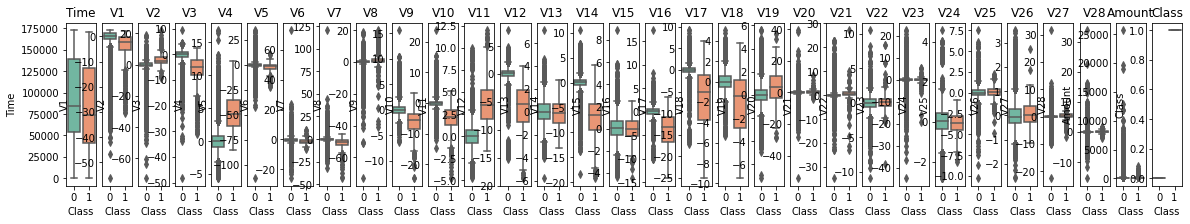

In [8]:
f, axes = plt.subplots(ncols=len(df.columns), figsize=(20,3))

idx = 0
for col in df.columns:
    sns.boxplot(x="Class", y=col, data=df, palette="Set2", ax=axes[idx])
    axes[idx].set_title(col )
    idx = idx + 1
plt.show()    

### Finding1 - Certain attributes contains outliers, correcting the same

### Step 3: Data Visualisations

<font color=blue><b>Q7. Which graph type would you prefer to use for visualizing each variable.</b></font>
<br>
For visualing each variable we preferred to use
- Histogram to visualise the distribution
- Boxplot to see class distribution and outliers
- Correlation Heatmap to find correlation between attributes and find dependent vs independent attributes


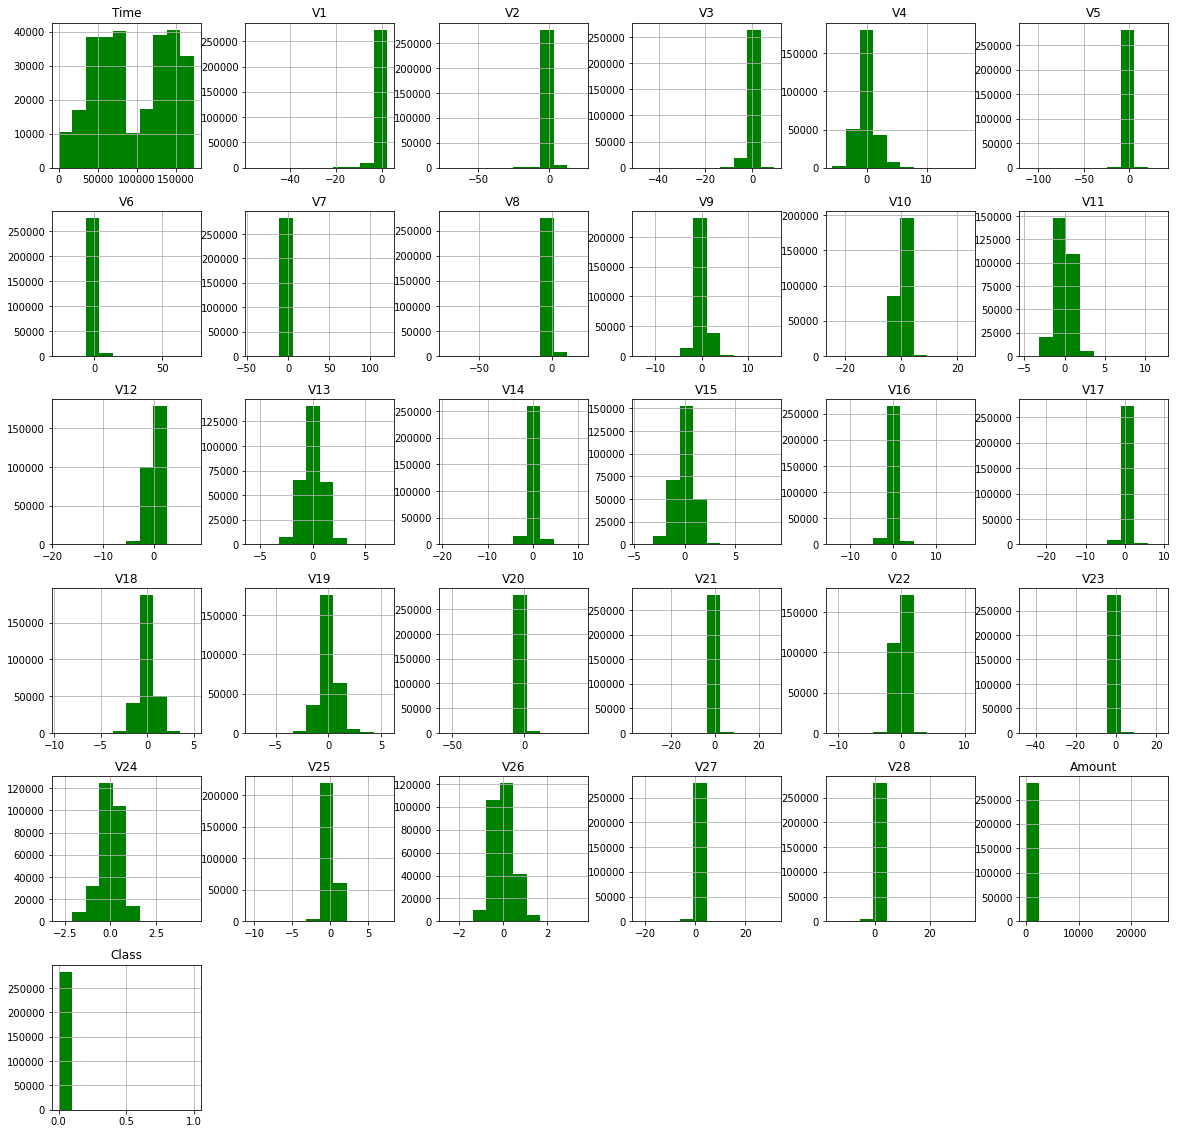

In [9]:
#histogram for all features
df.hist(bins=10,figsize=(20,20), color="green")
plt.show()

#### Exploring relationship between Fraud Trend for Feature Time & Amount (2 Ratio Attributes)

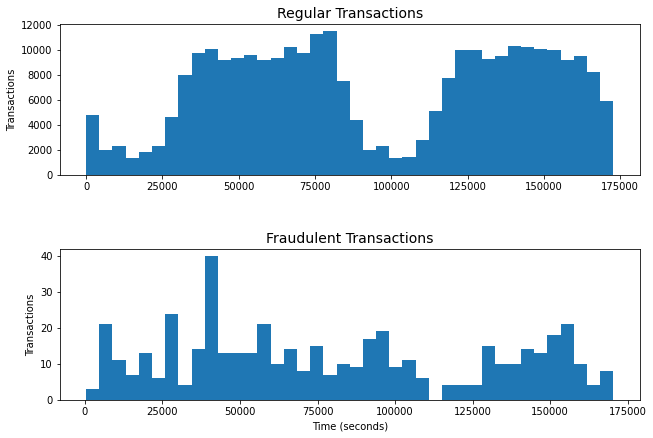

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df['Time'][df['Class'] == 0], bins=40)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df['Time'][df['Class'] == 1], bins=40)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)

#### We observe that even though number of fraud transactions are less, they seem to occur around time = 100000

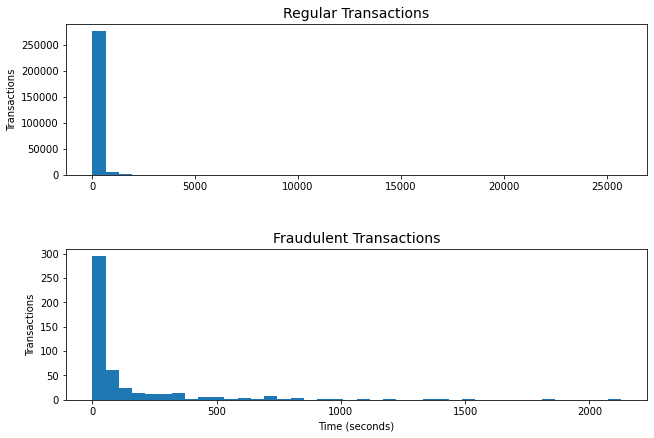

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))

ax[0].hist(df['Amount'][df['Class'] == 0], bins=40)
ax[0].set_title('Regular Transactions', fontsize=14)
ax[0].set_ylabel('Transactions')

ax[1].hist(df['Amount'][df['Class'] == 1], bins=40)
ax[1].set_title('Fraudulent Transactions', fontsize=14)
ax[1].set_ylabel('Transactions')
ax[1].set_xlabel('Time (seconds)')

plt.tight_layout(pad=4.0)

#### We observe that value fraud transactions are low

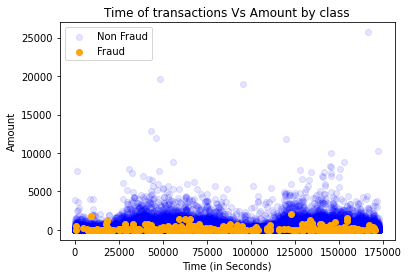

In [12]:
# Checking co-relation of Amount and Time w.r.t Fraud and Non-Fraud
fraud_cases=df[df['Class']==1]
non_fraud_cases=df[df['Class']==0]

#f.suptitle('Time of transaction vs Amount by class')
plt.scatter(non_fraud_cases.Time, non_fraud_cases.Amount, label="Non Fraud", color='blue', alpha=0.1)
plt.scatter(fraud_cases.Time, fraud_cases.Amount, label="Fraud", color='orange')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.legend(loc="upper left")
plt.title('Time of transactions Vs Amount by class')
plt.show()

<font color=blue><b>Q6. Is there any association between any two interval/ratio variable? How will you go about it?</b></font>
<br><br>The ideal way to find correlation between attributes is using correlation matrix. But untill the class distribution is balanced, checking correlation using scatter plot.<br>

<i>There is no relation found between Amount and Time, however it is observed </i>
- volume of fraud transactions is very less compared to non-fraud transactions
- value of fraud transaction is very low
- between time <b>100000</b> and <b>125000</b> there are very few fradulent transactions

#### Visualising Class Distribution

Non Frauds Cases = 283253  ( 99.83 % of the dataset )
Frauds Cases = 473  ( 0.17 % of the dataset )


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


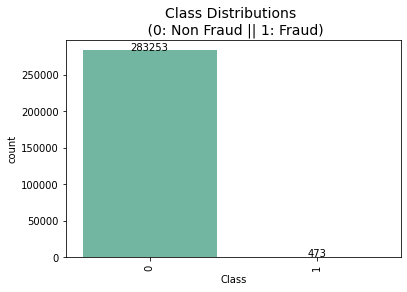

In [13]:
# Exploring Class Distribution
fraud_cases=len(df[df['Class']==1])
non_fraud_cases=len(df[df['Class']==0])

print('Non Frauds Cases =', non_fraud_cases, " (", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset )')
print('Frauds Cases =', fraud_cases, " (", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset )')

# fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14)
graph = sns.countplot('Class', data=df, palette="Set2")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### Step 4: Data Wrangling

<font color=blue><b>Q5. Transform any one variable which is interval/ratio to ordinal variable</b></font>
<br><br>Picking Time variable and transforming it into ordinal variable<br>
<b>Logic</b>Breaking the time value into chunks of 8 hours (28,800 sec), and naming categories as session 0 to 5<br>

<AxesSubplot:xlabel='time_category', ylabel='count'>

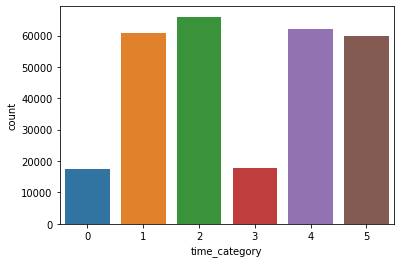

In [14]:
# 8 Hours converted as one session
bins = [-np.inf, 28800, 57600, 86400, 115200, 144000, 172800]
labels=['0','1','2','3', '4', '5']
df['time_category'] = pd.cut(df.Time, bins=bins, labels=labels)
sns.countplot(x="time_category", data=df)

#### Scaling Amount and Time Variable

<font color=blue><b>Q4. Which variables are ideal candidates for feature transformation?</b></font>
<br>Time and Amount are ideal candidates because of a very high standard deviation of 47K and 250


In [15]:
features = ["Time", "Amount"]
autoscaler = StandardScaler()
df[features] = autoscaler.fit_transform(df[features])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_category
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0,5
284803,1.642257,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0,5
284804,1.642278,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0,5
284805,1.642278,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0,5


#### Splitting the Data (Original DataFrame)
Before proceeding with the handling of Imbalance Class, using Random UnderSampling OR SMOTE technique we separate out the orginal dataframe for testing purposes. Although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set

In [16]:
fraud_cases=len(df[df['Class']==1])
non_fraud_cases=len(df[df['Class']==0])

print('Non Frauds Cases =', non_fraud_cases, " (", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset )')
print('Frauds Cases =', fraud_cases, " (", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset )')

X = df.drop(['Class','time_category'], axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels
print(Xtrain.shape)
print(ytrain.shape)

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(ytrain))
print(test_counts_label/ len(ytest))

Non Frauds Cases = 283253  ( 99.83 % of the dataset )
Frauds Cases = 473  ( 0.17 % of the dataset )
Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]
(226981, 30)
(226981,)
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


### Handling Imbalance Class - Method 1: Random Under Sampling

In this method we remove skewed data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
<ul>
<li>The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)</li>
<li>Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.</li>
<li>After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.</li>
</ul>
<b>Note:</b> The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

# Pick 492 fraud classes 
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:473]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_category
6336,-1.837959,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,-0.349333,1,0
111690,-0.473539,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,0.600750,1,2
34213,-1.205685,1.258896,0.405946,0.318831,0.684957,-0.308208,-1.054512,0.131136,-0.241510,-0.068954,...,-0.775307,0.121400,0.358198,0.239916,0.092587,-0.018510,0.032058,-0.349773,0,1
83417,-0.736528,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,-0.329725,1,2
204503,0.853035,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,-1.660183,...,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,-0.016744,1,4


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


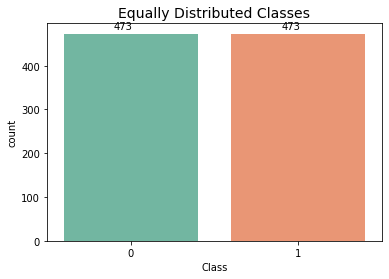

In [18]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

ax = sns.countplot('Class', data=new_df, palette="Set2")
plt.title('Equally Distributed Classes', fontsize=14)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+10))
plt.show()

### <b>Correlation Matrices</b>
Now that data is balanced, lets evaluate correlation matrices to understanding data relationship. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

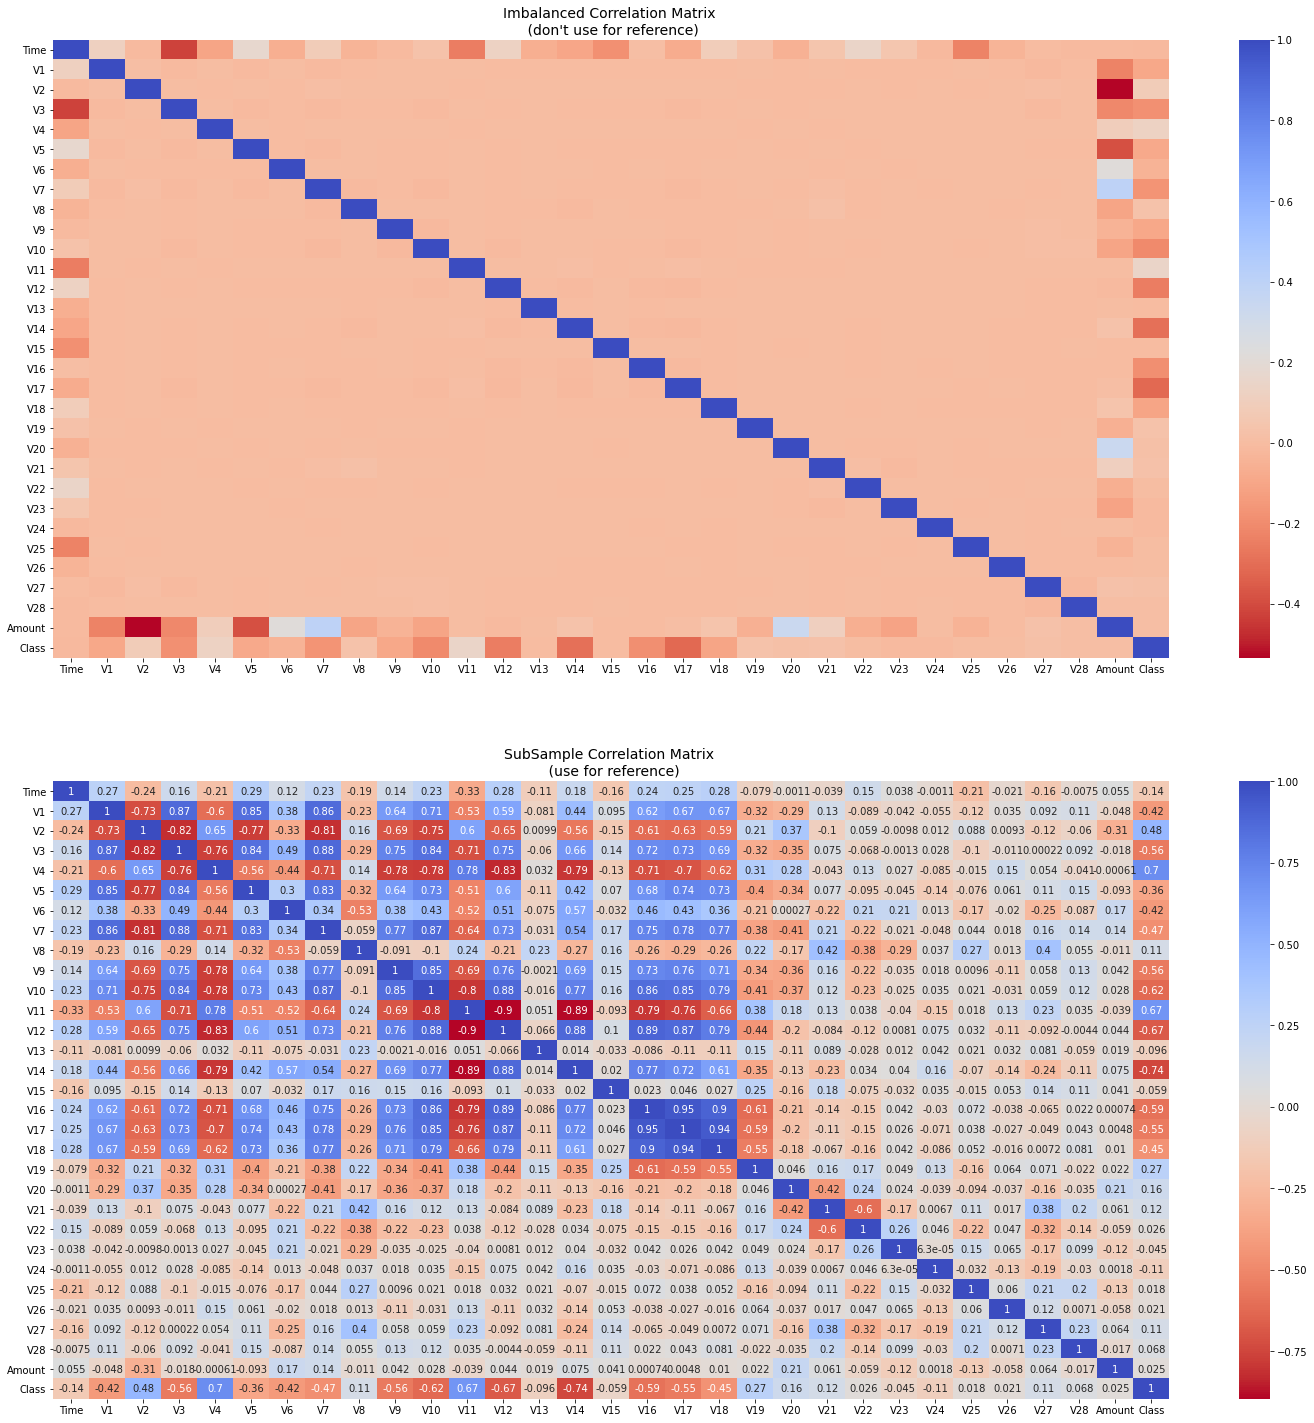

In [19]:
#correlation
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(25,25)) 
sns.heatmap(df.corr(), cmap='coolwarm_r',ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm_r', ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [20]:
cor_target = new_df.corr()["Class"]
print("Positive Correlated Classes\n", cor_target[cor_target>0.5])
print("\nNegative Correlated Classes\n", cor_target[cor_target<-0.5])

Positive Correlated Classes
 V4       0.703834
V11      0.667877
Class    1.000000
Name: Class, dtype: float64

Negative Correlated Classes
 V3    -0.556767
V9    -0.559787
V10   -0.624743
V12   -0.674466
V14   -0.743858
V16   -0.586307
V17   -0.549968
Name: Class, dtype: float64


### Correlation Summary

- Negative Correlations: V3, V9, V10,V12,V14,V16 and V17 are negatively correlated. Lower these values are, the more likely the end result will be a fraud transaction.
- Positive Correlations: V4, and V11 are positively correlated. Higher these values are, the more likely the end result will be a fraud transaction.
- BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

In [21]:
# Print correlated classes, correlation score > 0.8
correlated_features = {}
correlation_matrix = new_df.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features[colname]=correlation_matrix.columns[j]
            #correlated_features.add(colname)

print(len(correlated_features))
print(correlated_features)

9
{'V3': 'V2', 'V5': 'V3', 'V7': 'V5', 'V10': 'V9', 'V12': 'V11', 'V14': 'V12', 'V16': 'V12', 'V17': 'V16', 'V18': 'V17'}


In [22]:
cor_target.sort_values()
order = cor_target.sort_values(key=lambda x: x.abs())
order

V25       0.017598
V26       0.021377
Amount    0.025129
V22       0.026430
V23      -0.045422
V15      -0.059014
V28       0.067709
V13      -0.095544
V24      -0.107441
V27       0.111307
V8        0.114783
V21       0.118967
Time     -0.141347
V20       0.161673
V19       0.268503
V5       -0.358737
V1       -0.419828
V6       -0.420212
V18      -0.452043
V7       -0.468484
V2        0.481359
V17      -0.549968
V3       -0.556767
V9       -0.559787
V16      -0.586307
V10      -0.624743
V11       0.667877
V12      -0.674466
V4        0.703834
V14      -0.743858
Class     1.000000
Name: Class, dtype: float64

In [23]:
X=new_df.drop(["Class","time_category", "V7", "V17", "V16", "V3", "V12", "V10", "V14", "V5"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   features  vif_Factor
0      Time    1.544686
1        V1    4.706808
2        V2    6.505422
3        V4    5.739310
4        V6    2.820829
5        V8    2.218817
6        V9    5.366274
7       V11    6.660374
8       V13    1.128468
9       V15    1.319699
10      V18    4.426933
11      V19    2.041766
12      V20    1.918352
13      V21    2.615086
14      V22    2.191252
15      V23    1.388360
16      V24    1.176024
17      V25    1.444267
18      V26    1.116479
19      V27    1.675916
20      V28    1.216015
21   Amount    2.212222


#### <font color=blue><b>Q3. Identify the key independent variables critical for classification.</b></font><br>
<b>Correlation Matrix</b><br>
Correlation heatmap, as shown above, provides us with a visual depiction of the relationship between the variables. We do not want a set of independent variables which has a more or less similar relationship with the dependent variables. In above case we find following 10 attributes have correlation score of <b>ABS(0.8)</b>
{'V3': 'V2', 'V5': 'V3', 'V7': 'V5', 'V10': 'V9', 'V11': 'V10', 'V12': 'V11', 'V14': 'V12', 'V16': 'V12', 'V17': 'V16', 'V18': 'V17'}
<br>
<br><b>Variance inflation factor (VIF)</b><br>VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate’s standard deviation) of an estimated regression coefficient is increased because of collinearity. In general, we aim for the VIF of less than 10 for the independent variables.
Post analysis we get following attributes which can be removed  ["V7", "V17", "V3", "V16", "V12", "V10", "V14", "V5"]
<br><br>
<b>Relevant independent attributes critical for classification as</n><br>
Time, Amount, V1, V2, <font color=red>~V3~</font>, V4, <font color=red>~V5~</font>, V6, <font color=red>~V7~</font>, V8, V9, <font color=red>~V10~</font>, V11, <font color=red>~V12~</font>, V13, <font color=red>~V14~</font>, V15, <font color=red>~V16~</font>, <font color=red>~V17~</font>, V18, V19, V20, V21, V22, V23, V24, V25, V25, V26, V27, V28 
<br><br>
<font color=blue><b>Final Independent Variables-></b>Time, Amount, V1, V2, V4, V6, V8, V9, V11, V13, V15, V18, V19, V20, V21, V22, V23, V24, V25, V25, V26, V27, V28</font>


In [24]:
# Dropping correlated classes
to_drop_features = ["V7", "V17", "V3", "V16", "V12", "V10", "V14", "V5"]
print(new_df.shape)
new_df = new_df.drop(labels=to_drop_features, axis=1)
print(new_df.shape)
print(new_df.columns)

(946, 32)
(946, 24)
Index(['Time', 'V1', 'V2', 'V4', 'V6', 'V8', 'V9', 'V11', 'V13', 'V15', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class', 'time_category'],
      dtype='object')


#### Deleting dependent attributes from previously stored Testing data

In [25]:
df = df.drop(labels=to_drop_features, axis=1)

In [26]:
Xtrain = Xtrain.drop(labels=to_drop_features, axis=1)
Xtest = Xtest.drop(labels=to_drop_features, axis=1)

In [27]:
cor_target = new_df.corr()["Class"]
print("Positive Correlated Classes\n", cor_target[cor_target>0.5])
print("\nNegative Correlated Classes\n", cor_target[cor_target<-0.5])

Positive Correlated Classes
 V4       0.703834
V11      0.667877
Class    1.000000
Name: Class, dtype: float64

Negative Correlated Classes
 V9   -0.559787
Name: Class, dtype: float64


### Correlation Summary

- Negative Correlations: Only class V9 is negatively correlated. Lower these values are, the more likely the end result will be a fraud transaction.
- Positive Correlations: V4, V11 are positively correlated. Higher these values are, the more likely the end result will be a fraud transaction.
- BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

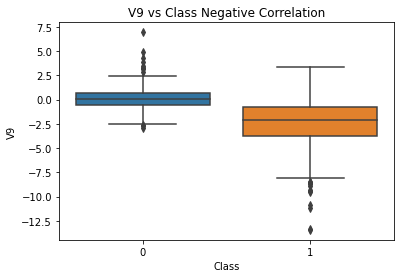

In [28]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V9", data=new_df)
plt.title('V9 vs Class Negative Correlation')
plt.show()

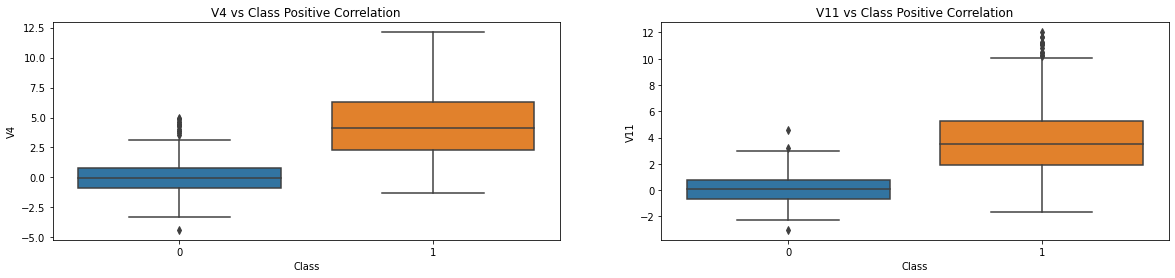

In [29]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')

plt.show()

### Anamoly Detection

In this section we remove extreme outliers, as this will have high positive influence on accuracy of the model. 
<br>
For this we will be using <b>Inter Quartile Range</b>We also take care of not removing more data so we use threshold for applying the IQR (15%)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


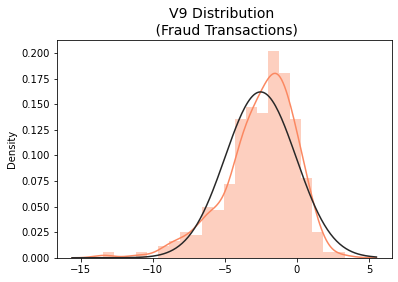

In [30]:
from scipy.stats import norm

v9_fraud_dist = new_df['V9'].loc[new_df['Class'] == 1].values
sns.distplot(v9_fraud_dist,fit=norm, color='#FB8861')
plt.title('V9 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [31]:
# # -----> V9 Removing Outliers (Highest Negative Correlated with Labels)
v_fraud = new_df['V9'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v_iqr = q75 - q25
print('iqr: {}'.format(v_iqr))

v_cut_off = v_iqr * 1.5
v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
print('Cut Off: {}'.format(v_cut_off))
print('V14 Lower: {}'.format(v_lower))
print('V14 Upper: {}'.format(v_upper))

outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
print('Feature V9 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V9 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V9'] > v_upper) | (new_df['V9'] < v_lower)].index)
print('----' * 44)

Quartile 25: -3.79675959454545 | Quartile 75: -0.788387529063343
iqr: 3.008372065482107
Cut Off: 4.512558098223161
V14 Lower: -8.30931769276861
V14 Upper: 3.7241705691598175
Feature V9 Outliers for Fraud Cases: 14
V9 outliers:[-11.1266235224579, -8.6030380974132, -8.9609216998511, -8.55011032700099, -9.46257260540015, -9.48145633401495, -9.28392451240577, -8.50705863675898, -8.63039030596902, -13.3201546920984, -8.50428479375643, -13.4340663182301, -10.8425258685569, -8.73967037069304]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


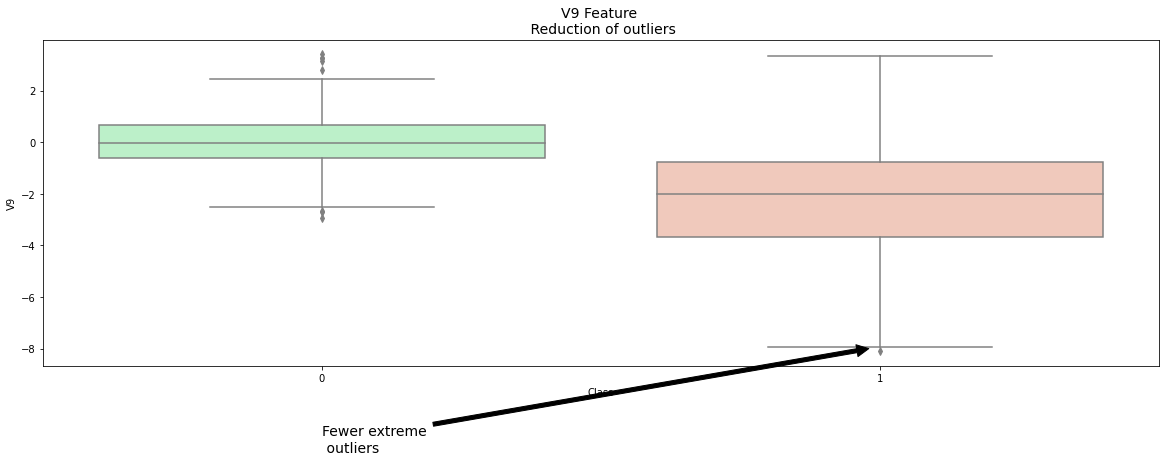

In [32]:
f,(ax1) = plt.subplots(1, 1, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V9
sns.boxplot(x="Class", y="V9", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V9 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -8), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

plt.show()

### Step 4: Dimensionality Reduction

Summary:
- t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
- Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario
- This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases

In [33]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop(['Class','time_category'], axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 6.2 s
PCA took 0.009 s
Truncated SVD took 0.006 s


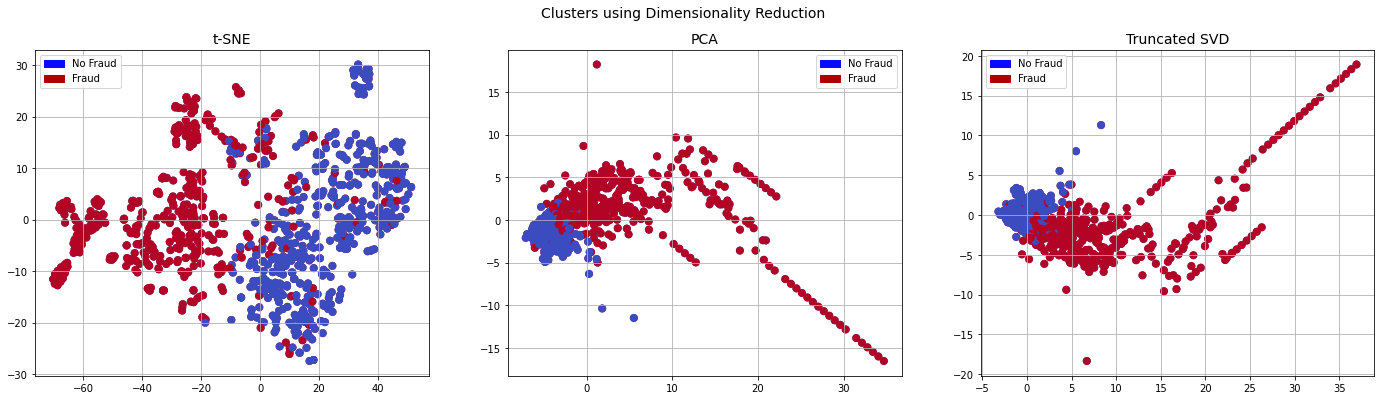

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])
#plt.style.use('fast') 
plt.show()

### Step 5: Classifier Implementation

#### Train, Test Split [80:20]

In [35]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop(['Class','time_category'], axis=1)
y = new_df['Class']

# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Let's implement classifiers
classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB()
}

In [37]:
# Basic Scanning of Accuracy by applying cross validation
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 87.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 86.0 % accuracy score


In [38]:
# Use GridSearchCV to find the best parameters.

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# tree_params = {"criterion": ["gini"], "max_depth": list(range(2,4,1)),  
#               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=sss,verbose=1, scoring='accuracy')
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

#Gaussian Classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     cv=sss, verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X_train, y_train);

gs_NB_clf = gs_NB.best_estimator_

print("Hyper parameters for Decision Tree", grid_tree.best_estimator_)
print("Hyper parameters for Gaussian Naive Bayes", gs_NB.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Hyper parameters for Decision Tree DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=5)
Hyper parameters for Gaussian Naive Bayes GaussianNB(var_smoothing=0.0002848035868435802)


Gaussian Classifier Cross Validation Score 85.99%
DecisionTree Classifier Cross Validation Score 89.76%


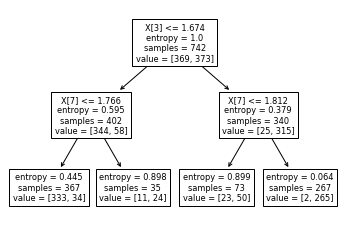

In [39]:
# Overfitting Case
gnb_score = cross_val_score(gs_NB_clf, X_train, y_train, cv=5)
print('Gaussian Classifier Cross Validation Score', round(gnb_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

#plt.style.use('classic')    
tree.plot_tree(tree_clf)
plt.show()

In [40]:
def graph_roc_curve_multiple(gnb_fpr, gnb_tpr,tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n GNB, Decision Classifiers', fontsize=18)
    plt.plot(gnb_fpr, gnb_tpr, label='Gaussian NB Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gnb_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

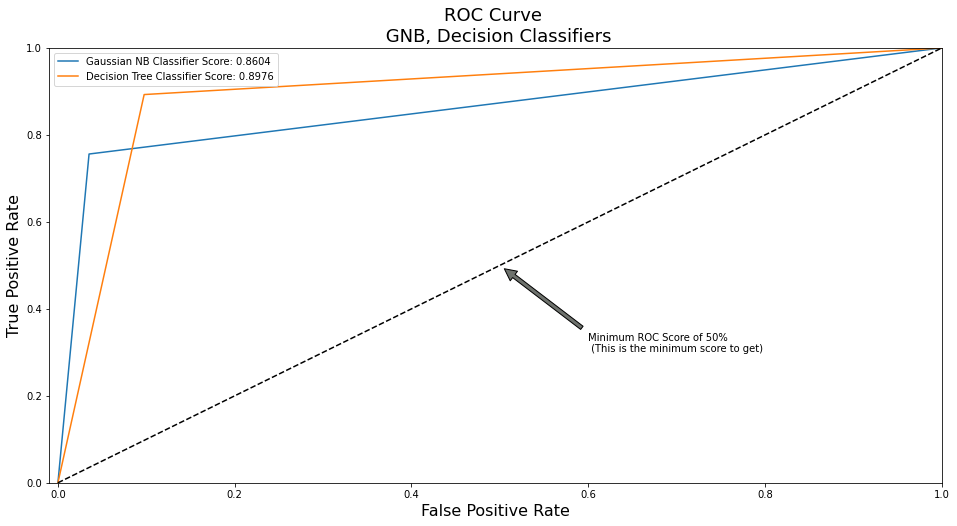

In [41]:
#Cross Validation Prediction
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
gnb_pred = cross_val_predict(gs_NB_clf, X_train, y_train, cv=5)

#ROC Curve
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_train, gnb_pred)

graph_roc_curve_multiple(gnb_fpr, gnb_tpr, tree_fpr, tree_tpr)

plt.show()

Decision Tree Cohen Kappa score:  75.10764575817525
Gaussian NB Classifier Cohen Kappa score:  70.19584569732937


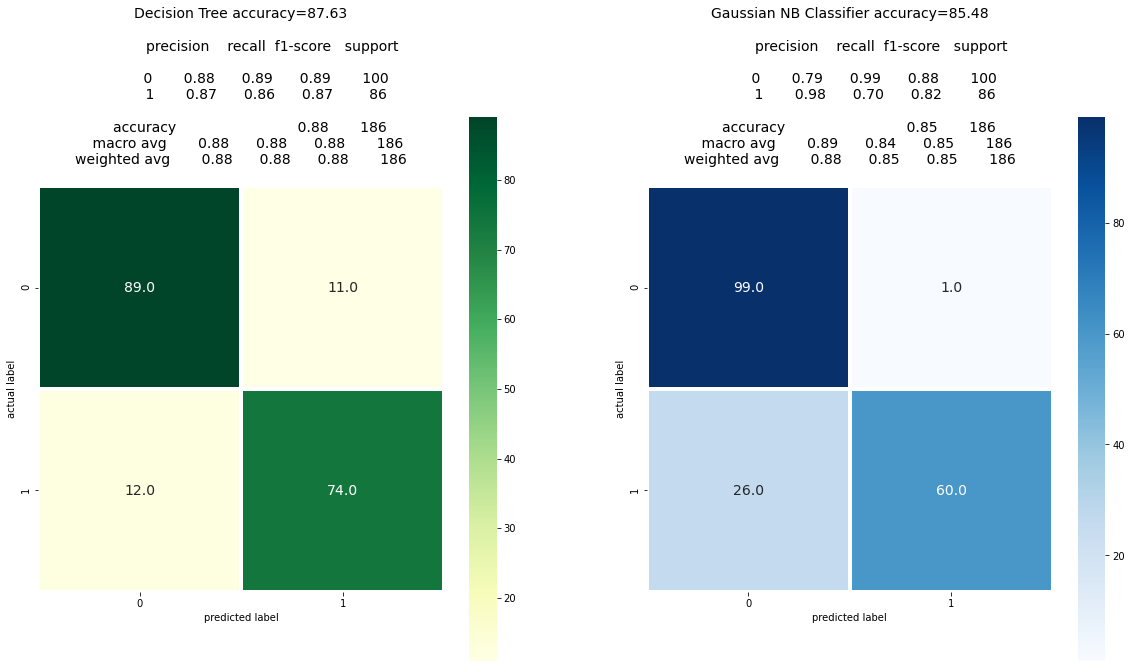

In [42]:
d = {'Classifier': ['Decision Tree', 'Decision Tree', 'Decision Tree','Decision Tree', 'Naive Bayes Gaussian', 'Naive Bayes Gaussian','Naive Bayes Gaussian', 'Naive Bayes Gaussian', 'Decision Tree', 'Decision Tree','Naive Bayes Gaussian', 'Naive Bayes Gaussian'], 
     'Sample': ['Original (RUS)','Random UnderSampling', 'Oversampling (SMOTE)','Original (SMOTE)', 
                'Original (RUS)','Random UnderSampling', 'Oversampling (SMOTE)','Original (SMOTE)', 
                'Pipeline-UnderSample', 'Pipeline-SMOTE','Pipeline-UnderSample', 'Pipeline-SMOTE'], 
     'Score': [0,0,0,0,0,0,0,0,0,0,0,0]}
final_scores = pd.DataFrame(data=d)

prediction=grid_tree.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Decision Tree Cohen Kappa score: ',cohen_kappa)

acc = accuracy_score(y_test,prediction)*100
final_scores.iloc[1, final_scores.columns.get_loc('Score')] = acc     
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(cm1, ax=ax1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='YlGn', annot_kws={"size": 14})
title = "Decision Tree accuracy="+str(round(acc,2))+"\n\n"+str(classification_report(y_test,prediction))
ax1.set_title(title, fontsize=14)
ax1.set_ylabel('actual label')
ax1.set_xlabel('predicted label')

prediction=gs_NB.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Gaussian NB Classifier Cohen Kappa score: ',cohen_kappa)

acc = accuracy_score(y_test,prediction)*100
final_scores.iloc[5, final_scores.columns.get_loc('Score')] = acc     
score=round(accuracy_score(y_test,prediction),3)
cm1=cm(y_test,prediction)

sns.heatmap(cm1, ax=ax2, annot=True,fmt=".1f",linewidths=3,square=True, cmap='Blues', annot_kws={"size": 14})
title = "Gaussian NB Classifier accuracy="+str(round(acc,2))+"\n\n"+str(classification_report(y_test,prediction))
ax2.set_title(title, fontsize=14)
ax2.set_ylabel('actual label')
ax2.set_xlabel('predicted label')

plt.show()

In [43]:
# Testing against original data split
prediction=grid_tree.predict(Xtest)
acc = accuracy_score(ytest,prediction)*100
final_scores.iloc[0, final_scores.columns.get_loc('Score')] = acc

prediction=gs_NB.predict(Xtest)
acc = accuracy_score(ytest,prediction)*100
final_scores.iloc[4, final_scores.columns.get_loc('Score')] = acc

final_scores

,Classifier,Sample,Score
0,Decision Tree,Original (RUS),93.539519
1,Decision Tree,Random UnderSampling,87.634409
2,Decision Tree,Oversampling (SMOTE),0.000000
3,Decision Tree,Original (SMOTE),0.000000
4,Naive Bayes Gaussian,Original (RUS),96.581197
5,Naive Bayes Gaussian,Random UnderSampling,85.483871
6,Naive Bayes Gaussian,Oversampling (SMOTE),0.000000
7,Naive Bayes Gaussian,Original (SMOTE),0.000000
8,Decision Tree,Pipeline-UnderSample,0.000000
9,Decision Tree,Pipeline-SMOTE,0.000000


#### Implementing Under Sampling Technique during Cross Validating the right way (only for Decision Tree to observe the difference)

In [44]:
# We will undersample during cross validating
undersample_X = df.drop(['Class', 'time_category'], axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), tree_clf) # UnderSampling happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(Xtrain.values[test], ytrain.values[test]))
    undersample_precision.append(precision_score(ytrain.values[test], undersample_prediction))
    undersample_recall.append(recall_score(ytrain.values[test], undersample_prediction))
    undersample_f1.append(f1_score(ytrain.values[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(ytrain.values[test], undersample_prediction))
   

Train: [ 55115  55561  55698 ... 283723 283724 283725] Test: [    0     1     2 ... 56749 56750 56751]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 55115  55561  55698 ... 113507 113508 113509]
Train: [     0      1      2 ... 283723 283724 283725] Test: [102795 102799 102839 ... 170246 170247 170248]
Train: [     0      1      2 ... 283723 283724 283725] Test: [160734 161135 161247 ... 226983 226984 226985]
Train: [     0      1      2 ... 226983 226984 226985] Test: [225674 225786 225945 ... 283723 283724 283725]
NearMiss Label Distribution: Counter({0: 473, 1: 473})


In [45]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Decision Tree Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax2.set_title("Gaussian Naive Bayes Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")   
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Suraj\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

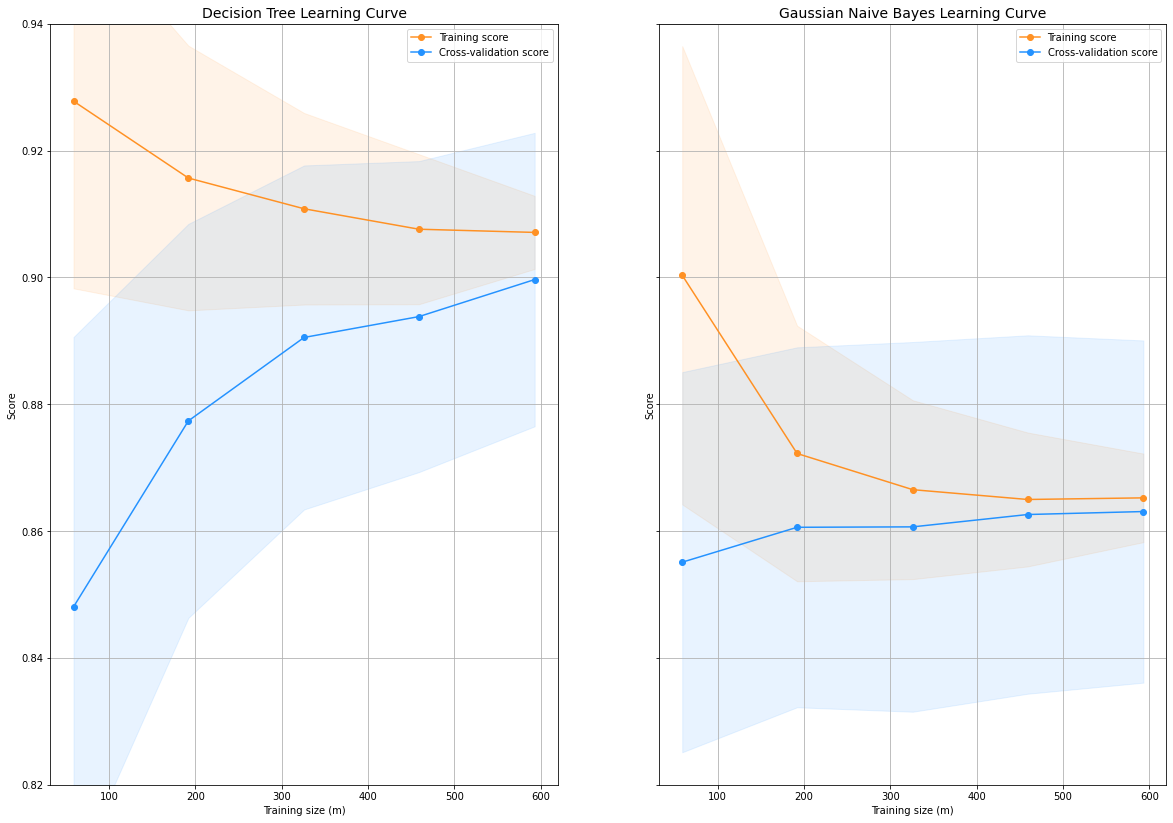

In [46]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42) #(0.87, 1.01)
plot_learning_curve(tree_clf, gs_NB_clf, X_train, y_train, (0.82, 0.94), cv=cv, n_jobs=4)

In [47]:
y_pred = tree_clf.predict(X_train)

# Overfitting Case
print('---' * 20)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 20)

# How it should look like
print('---' * 20)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 20)

final_scores.iloc[8, final_scores.columns.get_loc('Score')] = np.mean(undersample_accuracy)*100

------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.61
F1 Score: 0.74
Accuracy Score: 0.66
------------------------------------------------------------
------------------------------------------------------------
How it should be:

Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.41
F1 Score: 0.00
------------------------------------------------------------


In [48]:
labels = ['No Fraud', 'Fraud']
under_prediction = tree_clf.predict(Xtest)
print(classification_report(ytest, under_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.41      0.58     56650
       Fraud       0.00      0.92      0.01        95

    accuracy                           0.41     56745
   macro avg       0.50      0.66      0.29     56745
weighted avg       1.00      0.41      0.58     56745



In [49]:
final_scores

,Classifier,Sample,Score
0,Decision Tree,Original (RUS),93.539519
1,Decision Tree,Random UnderSampling,87.634409
2,Decision Tree,Oversampling (SMOTE),0.000000
3,Decision Tree,Original (SMOTE),0.000000
4,Naive Bayes Gaussian,Original (RUS),96.581197
5,Naive Bayes Gaussian,Random UnderSampling,85.483871
6,Naive Bayes Gaussian,Oversampling (SMOTE),0.000000
7,Naive Bayes Gaussian,Original (SMOTE),0.000000
8,Decision Tree,Pipeline-UnderSample,57.438657
9,Decision Tree,Pipeline-SMOTE,0.000000


In [50]:
# from sklearn.metrics import average_precision_score
# undersample_y_score = tree_clf.predict_proba(Xtest)
# undersample_average_precision = average_precision_score(ytest.values, undersample_y_score[0])

# print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

### Handling Imbalance Class - Method2 : Over Sampling

Running classifiers again post applying method 2 to compare which will result in better metrics

In [51]:
labels = ['No Fraud', 'Fraud']
smote_prediction = tree_clf.predict(Xtest)
print(classification_report(ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.41      0.58     56650
       Fraud       0.00      0.92      0.01        95

    accuracy                           0.41     56745
   macro avg       0.50      0.66      0.29     56745
weighted avg       1.00      0.41      0.58     56745



(283726, 24)
Distribution of the Classes in the subsample dataset
0    0.998333
1    0.001667
Name: Class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


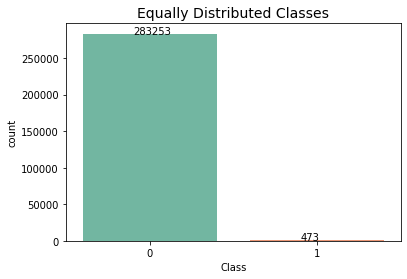

In [52]:
print(df.shape)
print('Distribution of the Classes in the subsample dataset')
print(df['Class'].value_counts()/len(df))
ax = sns.countplot('Class', data=df, palette="Set2")
plt.title('Equally Distributed Classes', fontsize=14)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+10))
plt.show()

In [53]:
df_majority = df.loc[df.Class == 0].copy()
df_minority = df.loc[df.Class == 1].copy()
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=284315,  # to match majority class
                             random_state=123) 
new_df = pd.concat([df_majority, df_minority_upsampled])
new_df.head()

,Time,V1,V2,V4,V6,V8,V9,V11,V13,V15,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_category
142879,-0.206779,1.182183,1.299576,1.669216,-1.536089,-0.298284,-0.550703,1.422225,0.298544,1.242621,...,-0.288590,-0.144640,0.089351,0.758616,-0.286459,0.060256,0.097947,-0.349773,0,2
34878,-1.199345,-0.959509,-0.655153,-1.738692,-0.581242,0.240570,-1.724045,1.665797,-0.428365,-0.331181,...,-0.169439,0.287216,-0.345928,-0.558819,-0.710516,0.094747,0.143477,-0.253486,0,1
120593,-0.398646,-0.868311,0.713183,0.024481,0.062151,-0.420802,0.008251,-0.179500,0.959817,-0.137759,...,-0.145566,-0.201323,0.144315,0.363104,0.280298,-0.151236,-0.336576,-0.153646,0,2
274734,1.503106,1.858420,-0.559354,0.684622,-0.164832,-0.084747,1.458027,-1.468033,-0.186541,-1.480009,...,-0.697079,0.190317,0.662488,0.012899,-0.538894,-0.003476,-0.030298,-0.009076,0,5
159287,0.370252,-0.722760,0.213574,-1.594112,0.742771,0.487557,-0.310845,0.850137,-0.339457,-0.866616,...,-0.383163,0.174363,-1.059409,-0.954924,-0.048187,0.149997,0.216060,-0.348175,0,3


Distribution of the Classes in the subsample dataset
1    0.500936
0    0.499064
Name: Class, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


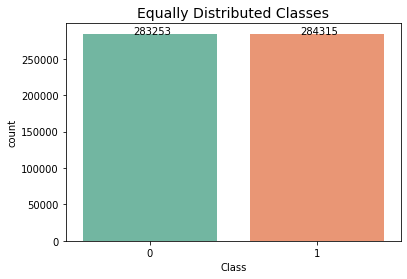

In [54]:
# Oversampling before cross validating (prone to underfit)

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

ax = sns.countplot('Class', data=new_df, palette="Set2")
plt.title('Equally Distributed Classes', fontsize=14)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+10))
plt.show()

In [55]:
X = new_df.drop(['Class','time_category'], axis=1)
y = new_df['Class']

# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Basic Scanning of Accuracy by applying cross validation
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score
Classifiers:  GaussianNB Has a training score of 84.0 % accuracy score


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Gaussian Classifier Cross Validation Score 83.65%
DecisionTree Classifier Cross Validation Score 92.31%


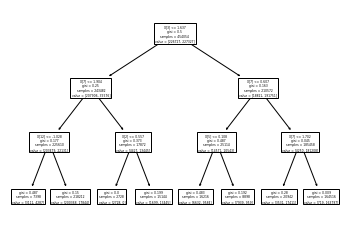

Hyper parameters for Decision Tree DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
Hyper parameters for Gaussian Naive Bayes GaussianNB(var_smoothing=0.0001519911082952933)


In [57]:
# Use GridSearchCV to find the best parameters.

# DecisionTree Classifier
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
#               "min_samples_leaf": list(range(5,7,1))}

tree_params = {"criterion": ["gini"], "max_depth": list(range(2,4,1)),  
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=sss, n_jobs=5, verbose=1, scoring='accuracy')
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

#Gaussian Classifier
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB, 
                     n_jobs=5, cv=sss, verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X_train, y_train);

gs_NB_clf = gs_NB.best_estimator_

# Overfitting Case
gnb_score = cross_val_score(gs_NB_clf, X_train, y_train, cv=5)
print('Gaussian Classifier Cross Validation Score', round(gnb_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

tree.plot_tree(tree_clf)
plt.show()

print("Hyper parameters for Decision Tree", grid_tree.best_estimator_)
print("Hyper parameters for Gaussian Naive Bayes", gs_NB.best_estimator_)

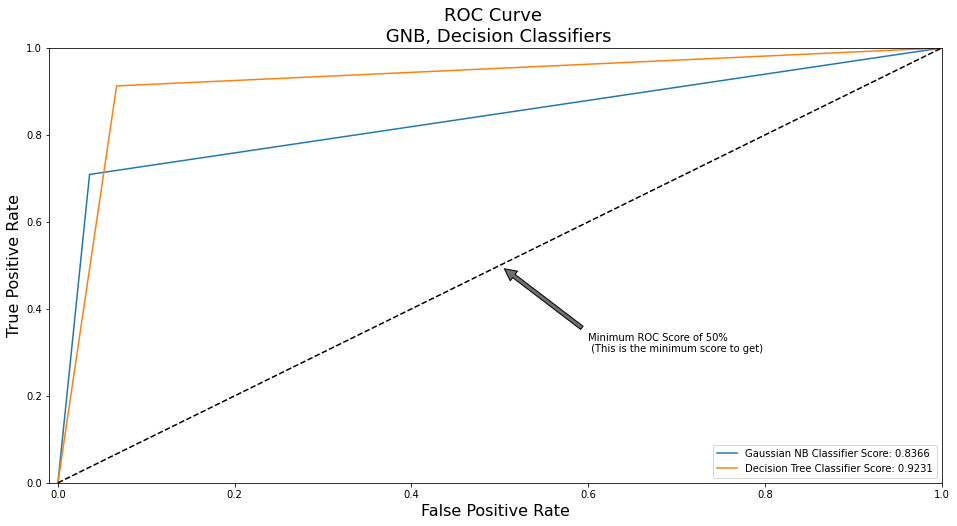

In [58]:
#Cross Validation Prediction
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)
gnb_pred = cross_val_predict(gs_NB_clf, X_train, y_train, cv=5)

#ROC Curve
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_train, gnb_pred)

graph_roc_curve_multiple(gnb_fpr, gnb_tpr, tree_fpr, tree_tpr)
plt.show()

Decision Tree Cohen Kappa score:  84.91871250197995
Gaussian NB Classifier Cohen Kappa score:  67.51913717377217


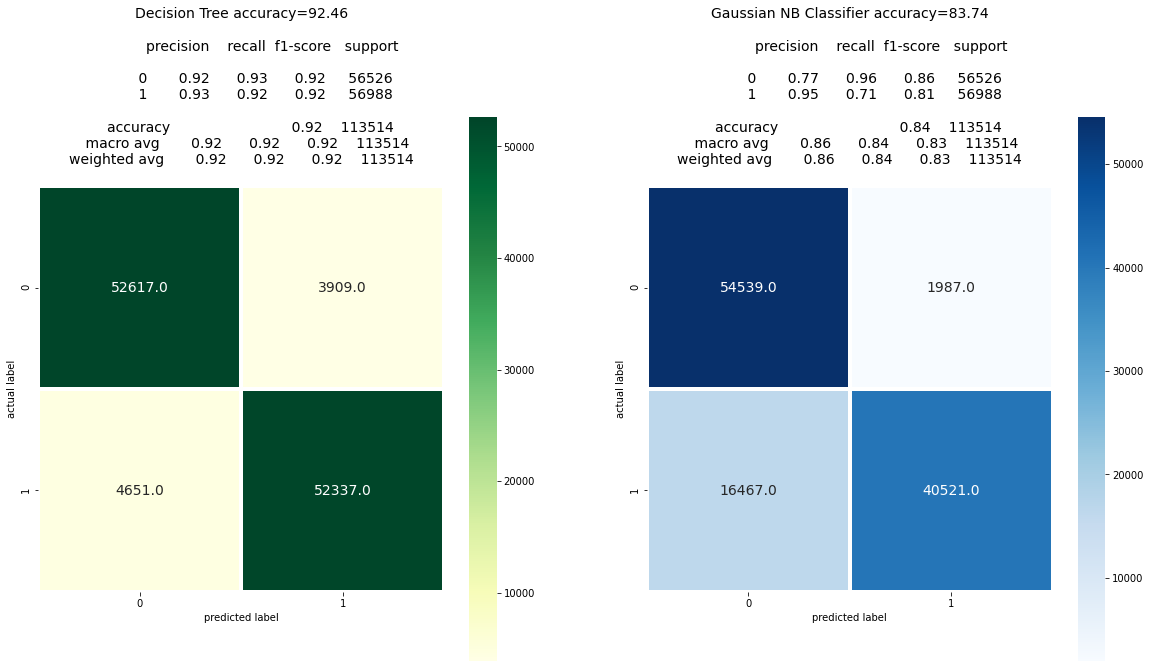

In [59]:
prediction=grid_tree.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Decision Tree Cohen Kappa score: ',cohen_kappa)

acc = accuracy_score(y_test,prediction)*100
final_scores.iloc[2, final_scores.columns.get_loc('Score')] = acc     
score=round(accuracy_score(y_test,prediction),3)
cm= confusion_matrix
cm1=cm(y_test,prediction)


f,(ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.heatmap(cm1, ax=ax1, annot=True,fmt=".1f",linewidths=3,square=True, cmap='YlGn', annot_kws={"size": 14})
title = "Decision Tree accuracy="+str(round(acc,2))+"\n\n"+str(classification_report(y_test,prediction))
ax1.set_title(title, fontsize=14)
ax1.set_ylabel('actual label')
ax1.set_xlabel('predicted label')

prediction=gs_NB.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, prediction)*100
print('Gaussian NB Classifier Cohen Kappa score: ',cohen_kappa)

acc = accuracy_score(y_test,prediction)*100
final_scores.iloc[6, final_scores.columns.get_loc('Score')] = acc     
score=round(accuracy_score(y_test,prediction),3)
cm1=cm(y_test,prediction)

sns.heatmap(cm1, ax=ax2, annot=True,fmt=".1f",linewidths=3,square=True, cmap='Blues', annot_kws={"size": 14})
title = "Gaussian NB Classifier accuracy="+str(round(acc,2))+"\n\n"+str(classification_report(y_test,prediction))
ax2.set_title(title, fontsize=14)
ax2.set_ylabel('actual label')
ax2.set_xlabel('predicted label')

plt.show()

In [60]:
prediction=grid_tree.predict(Xtest)
acc = accuracy_score(ytest,prediction)*100
final_scores.iloc[3, final_scores.columns.get_loc('Score')] = acc

prediction=gs_NB.predict(Xtest)
acc = accuracy_score(ytest,prediction)*100
final_scores.iloc[7, final_scores.columns.get_loc('Score')] = acc

final_scores

,Classifier,Sample,Score
0,Decision Tree,Original (RUS),93.539519
1,Decision Tree,Random UnderSampling,87.634409
2,Decision Tree,Oversampling (SMOTE),92.459080
3,Decision Tree,Original (SMOTE),95.398714
4,Naive Bayes Gaussian,Original (RUS),96.581197
5,Naive Bayes Gaussian,Random UnderSampling,85.483871
6,Naive Bayes Gaussian,Oversampling (SMOTE),83.742974
7,Naive Bayes Gaussian,Original (SMOTE),96.697506
8,Decision Tree,Pipeline-UnderSample,57.438657
9,Decision Tree,Pipeline-SMOTE,0.000000


#### Implementing SMOTE Technique i.e. during Cross Validating the right way (only for Decision Tree to observe the difference)

In [61]:
# Implementing SMOTE Technique 
# Cross Validating the right way

print('Length of X (train): {} | Length of y (train): {}'.format(len(Xtrain), len(ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(Xtest), len(ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Parameters
for train, test in sss.split(Xtrain.values, ytrain.values):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), tree_clf) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(Xtrain.values[train], ytrain.values[train])
    prediction = tree_clf.predict(Xtrain.values[test])
    
    accuracy_lst.append(pipeline.score(Xtrain.values[test], ytrain.values[test]))
    precision_lst.append(precision_score(ytrain.values[test], prediction))
    recall_lst.append(recall_score(ytrain.values[test], prediction))
    f1_lst.append(f1_score(ytrain.values[test], prediction))
    auc_lst.append(roc_auc_score(ytrain.values[test], prediction))
    
print('---' * 30)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 30)
final_scores.iloc[9, final_scores.columns.get_loc('Score')] = np.mean(accuracy_lst)*100

Length of X (train): 226981 | Length of y (train): 226981
Length of X (test): 56745 | Length of y (test): 56745
------------------------------------------------------------------------------------------

accuracy: 0.9497272237550616
precision: 0.03465781741079244
recall: 0.8464912280701753
f1: 0.06586517428767044
------------------------------------------------------------------------------------------


In [62]:
labels = ['No Fraud', 'Fraud']
smote_prediction = tree_clf.predict(Xtest)
print(classification_report(ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56650
       Fraud       0.08      0.82      0.15        95

    accuracy                           0.98     56745
   macro avg       0.54      0.90      0.57     56745
weighted avg       1.00      0.98      0.99     56745



In [63]:
final_scores

,Classifier,Sample,Score
0,Decision Tree,Original (RUS),93.539519
1,Decision Tree,Random UnderSampling,87.634409
2,Decision Tree,Oversampling (SMOTE),92.459080
3,Decision Tree,Original (SMOTE),95.398714
4,Naive Bayes Gaussian,Original (RUS),96.581197
5,Naive Bayes Gaussian,Random UnderSampling,85.483871
6,Naive Bayes Gaussian,Oversampling (SMOTE),83.742974
7,Naive Bayes Gaussian,Original (SMOTE),96.697506
8,Decision Tree,Pipeline-UnderSample,57.438657
9,Decision Tree,Pipeline-SMOTE,94.972722


## Results

1. The dataset is imbalance in terms of number of fraud transactions being only fraction of compared to non-fraud transactions

Non Frauds Cases = 283253  ( 99.83 % of the dataset )
Frauds Cases = 473  ( 0.17 % of the dataset )


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


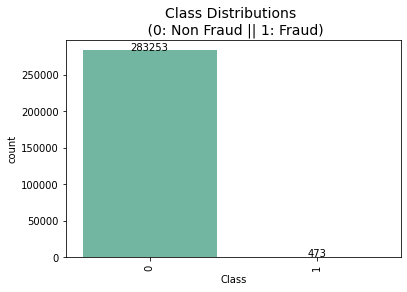

In [64]:
# Exploring Class Distribution
fraud_cases=len(df[df['Class']==1])
non_fraud_cases=len(df[df['Class']==0])

print('Non Frauds Cases =', non_fraud_cases, " (", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset )')
print('Frauds Cases =', fraud_cases, " (", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset )')

# fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Class Distributions \n (0: Non Fraud || 1: Fraud)', fontsize=14)
graph = sns.countplot('Class', data=df, palette="Set2")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<font color=blue><b>Q9. Investigate and compare the performance of decision tree and Naive Bayes Classifier. </b></font><br>
<br>
In following 2 sections we compare the performance of decision tree and naive bayes classifier. In summary, we found decision tree to perform better compared to Naive Bayes giving 92% accuracy against 84%.


2. There are 2 approaches for dealing with Imbalance class, in our study we found that Synthetic Minority Oversampling Technique (SMOTE) gave better accuracy score compared to Radmon Under Sampling. We also  found that Decition Tree classifier gave better results compared to Gaussian Naive Baised Classifier

In [65]:
final_scores

,Classifier,Sample,Score
0,Decision Tree,Original (RUS),93.539519
1,Decision Tree,Random UnderSampling,87.634409
2,Decision Tree,Oversampling (SMOTE),92.459080
3,Decision Tree,Original (SMOTE),95.398714
4,Naive Bayes Gaussian,Original (RUS),96.581197
5,Naive Bayes Gaussian,Random UnderSampling,85.483871
6,Naive Bayes Gaussian,Oversampling (SMOTE),83.742974
7,Naive Bayes Gaussian,Original (SMOTE),96.697506
8,Decision Tree,Pipeline-UnderSample,57.438657
9,Decision Tree,Pipeline-SMOTE,94.972722


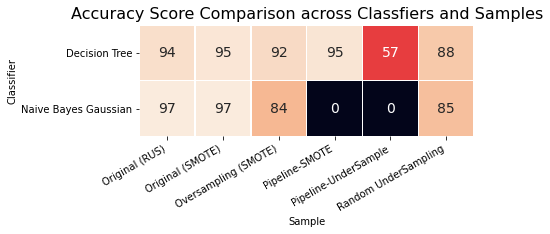

Sample,Original (RUS),Original (SMOTE),Oversampling (SMOTE),Pipeline-SMOTE,Pipeline-UnderSample,Random UnderSampling
Classifier,,,,,,
Decision Tree,93.539519,95.398714,92.459080,94.972722,57.438657,87.634409
Naive Bayes Gaussian,96.581197,96.697506,83.742974,0.000000,0.000000,85.483871


In [66]:
ct = pd.crosstab(final_scores.Classifier, final_scores.Sample, values=final_scores.Score, aggfunc="sum" )
sns.heatmap(ct, annot=True, cbar=False, linecolor='white', linewidths=0.5, square=True, annot_kws={"size":14})
plt.title("Accuracy Score Comparison across Classfiers and Samples", fontsize=16)
plt.xticks(rotation=30, horizontalalignment="right")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()
ct

<font color=blue><b>Q8. Do you think decision tree is an ideal classifier for this problem? </b></font><br>
<br>
Based on our findings, Decision Tree is ideal classifier for this problem giving 92% accuracy, as against 84% for Naive Bayes. Even on other metrics of F-Score and AUC we find Decision Tree performed well compared to Naive Bayes. <b>One point noticed is the accurany scores were higher for Oversampling Method (SMOTE) for handling imbalance class.</b> For Under Sampling and Over Samlping we applied 2 approaches using Pipeline and performing required sampling during cross validation vs performing samlping and then running classifer. <i>We found that performing samping during cross validation give more acuracte results while the other method is prone to overfitting or underfitting.</i> See below:

3. Apart from Accuracy score, we also compared other metrics like Precision, Recall, and F-score which gives the harmonic mean of precision and recall. As per F-score, Decision Tree gave better results compared to Gaussian Naive Bayes when we performed Oversampling as comapred to Under Sampling (.89 and .92; .85 and .83). Another interesting thing we noted is that Decision Tree gave 100% training score for under sampling, but we performend accuracy score on our Original Test data which we had preserved before performing sampling

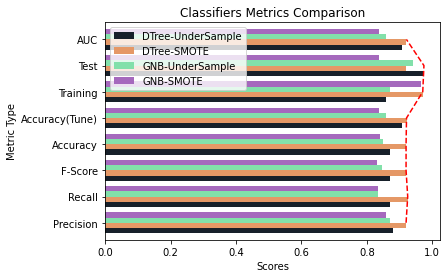

In [67]:
df_data = pd.DataFrame({'DTree-UnderSample':[.88,.87,.87,.87,.9085,.86,.9746,.9062],
        'DTree-SMOTE':[.92,.925,.92,.92,.9214,.971,.921,.921],
        'GNB-UnderSample':[.87,.835,.845,.85,.8586,.87,.9427,.8595],
        'GNB-SMOTE':[.86,.835,.83,.84,.8366,.9668,.8364,.8368]
         },
        index=['Precision', 'Recall', 'F-Score', 'Accuracy','Accuracy(Tune)','Training','Test','AUC'])
#df_data
df_data.plot(kind="barh", rot=0,width=.8, color=['#17202A', '#E59866','#82E0AA', '#A569BD'], legend=True)
plt.title("Classifiers Metrics Comparison")
plt.ylabel("Metric Type")
plt.xlabel("Scores")
plt.legend(loc ="upper left") 
xtrend = ['Precision', 'Recall', 'F-Score', 'Accuracy','Accuracy(Tune)','Training','Test','AUC']
ytrend = [.92,.925,.92,.92, .9214, .971,.9746, .921]
plt.plot(ytrend, xtrend, 'r-', linestyle="--")
plt.show()

<font color=blue><b>Q10. What are the challenges in deploying the solution in real time? </b></font><br>
<br>
Few Challenges
- The model is having Type II error and Type I which indicates that we will need additional operational measure post deploying of solution till these errors are reduced to agreed threholds, as the model may not classifying Fraud Transactions correctly or may mis-classify a actual Fraud Transaction
- The sample size for Fraud Transactions is very less, as this increases the model will improve the metrics and will become more reliable
- Recommendation is that during initial period of go live the model should  trained more frequently, and once the agreed threshold of metric scores are met we can reduce the training frequency
- As most of the attributes were masked, we could not apply better domain inference on the features, once we understand these attributes better we can further tune the model with more meaningful features to perform well
- For model to be deployed in real time, the volume processing and required response times needs to be evaluated and accordingly the deploy the model

In [68]:
program_end = time.time()
print("Program run time is {:.2f} s".format((program_end - program_start)))

Program run time is 247.25 s
